In [1]:
from dataclasses import dataclass, field
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
from typing import List, Dict
from pathlib import Path
from failure_recognition_signal_processing.parse_kgt_data import create_machine_object, combine_multi_machine_data
from failure_recognition_signal_processing.assess_kgt_data import assess_test_results_in_envelope, classify_using_envelope, calculate_envelope, plot_sensor_envelope, split_training_data_by_label

from failure_recognition_signal_processing.parse_kgt_data import Machine

In [2]:
# Set global parameters
target_sensors = ["s5", "s9", "s11", "s13", "s15"]
replacement_dates = {"7": 115, "11": 100, "12": 80, "14": 57} # maps machine number to first index after replacement
discarded_timeseries = {"2": (["s5", "s15"], list(range(50, 53))), "9": (target_sensors, list(range(39))), "12": (["s5", "s9", "s11", "s13"], [109])}

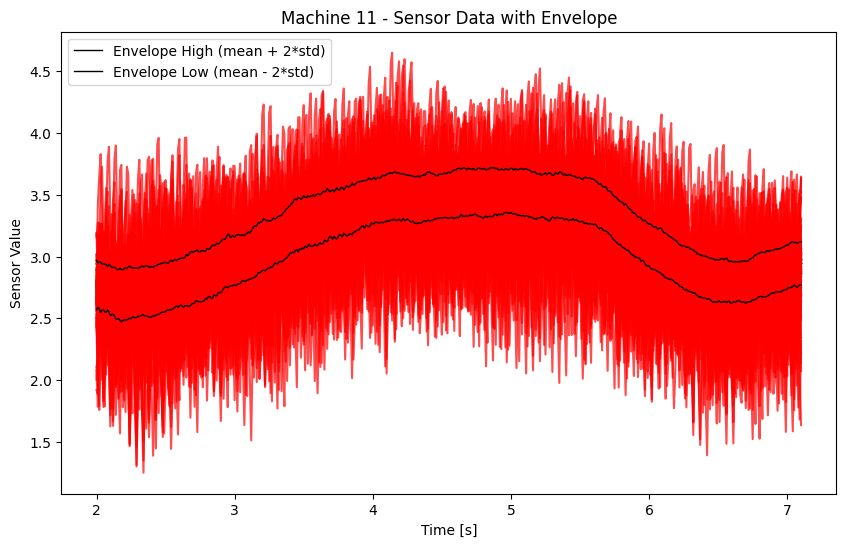

In [3]:
# Example usage for one machine
label_file = Path("data_2/label_segmented/11.xlsx")
machine_file = Path("data_2/train/11.csv") #Path("machine_data\\2.csv")
time_range = (2, 7.10)  # Example time range from 0 to 120 seconds
beta_envelope = 2

machine = create_machine_object(machine_file, label_file, time_range, target_sensors, replacement_dates, discarded_timeseries)

sensor_sx = machine.get_sensor_data_by_name("s5").dataframe

sensor_sx_data_label_1 = sensor_sx.loc[:, machine.labels == True]
sensor_sx_data_label_0 = sensor_sx.loc[:, machine.labels == False]

envelope = calculate_envelope(sensor_sx_data_label_0, beta_envelope)

plot_sensor_envelope(envelope, sensor_sx_data_label_0, sensor_sx_data_label_1, beta_envelope, f"Machine {machine.machine_name}")

#### Multiple machines (cross validation)

In [4]:
target_sensors = ["s5", "s9", "s11", "s13", "s15"]
time_range = (2, 7.10)  # Example time range from 0 to 120 seconds

machine_cnt = 15
target_machines = list(str(x) for x in range(1, machine_cnt))
target_machines.remove("13")
beta_envelope = 2
envelope_min_total_violation = 1 # min data points outside the evelope to be labelled as "1"

sensor_group = ["s5", "s9", "s15"]
sensor_group_decision_count = 1

In [5]:
machine_list: List[Machine] = []
skipped_names = []

for i in target_machines:
    label_file = Path(f"data_2/label_segmented/{i}.xlsx")
    machine_file = Path(f"data_2/train/{i}.csv")

    try:
        machine = create_machine_object(machine_file, label_file, time_range, target_sensors, replacement_dates, discarded_timeseries)
    except Exception as e:
        print(str(e))
        skipped_names.append(str(i))
        continue
    else:
        machine_list.append(machine)

if len(skipped_names) > 0:
    print(f"Skipping machines {skipped_names} (for nan values or missing .csv file)")

tmp = (set(replacement_dates.keys()) - set(skipped_names)) - set([m.machine_name for m in machine_list])
assert(len(tmp) == 0)



Results for sensor s5
Merging training data from machines 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


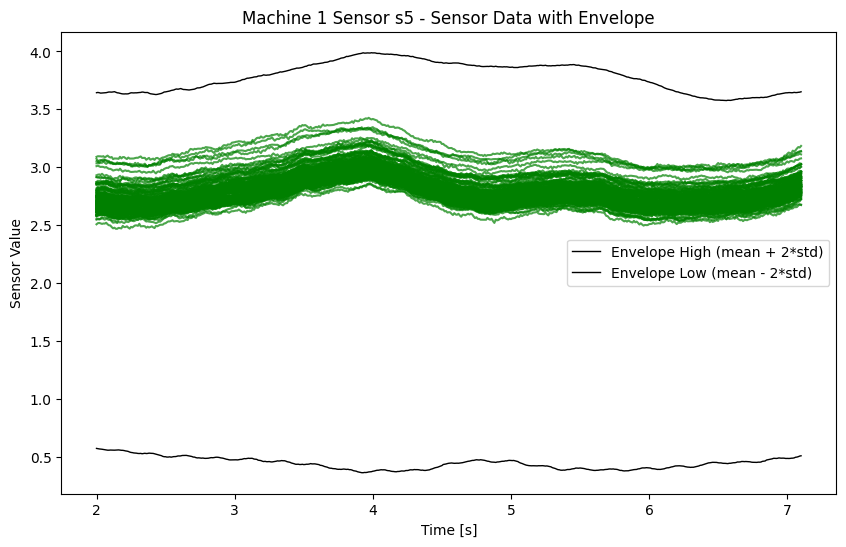

Merging training data from machines 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


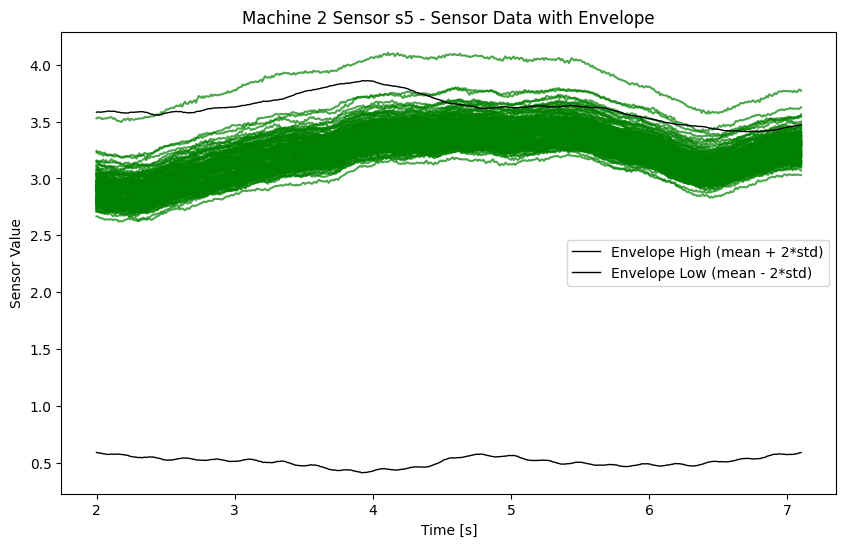

Merging training data from machines 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


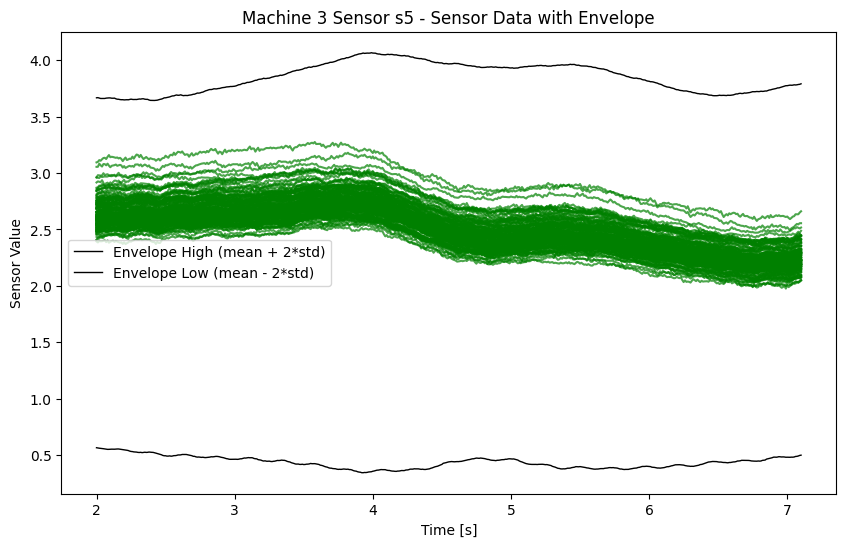

Merging training data from machines 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14


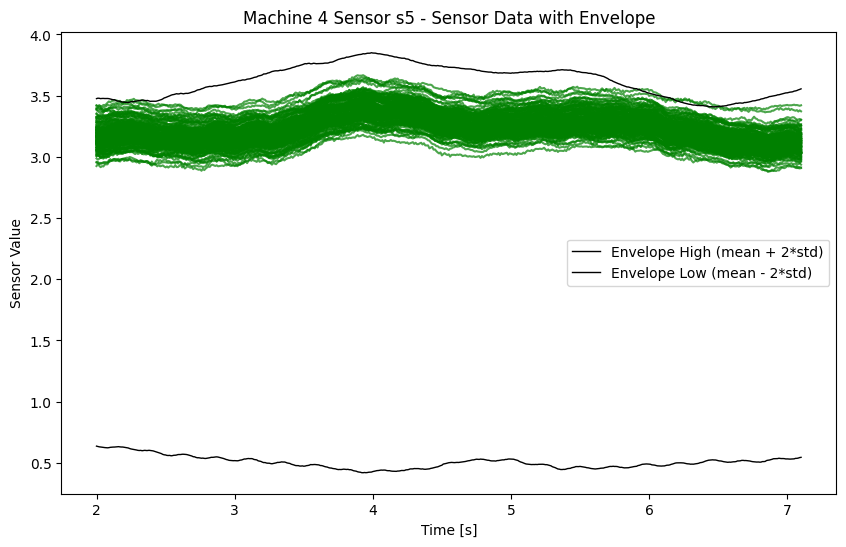

Merging training data from machines 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14


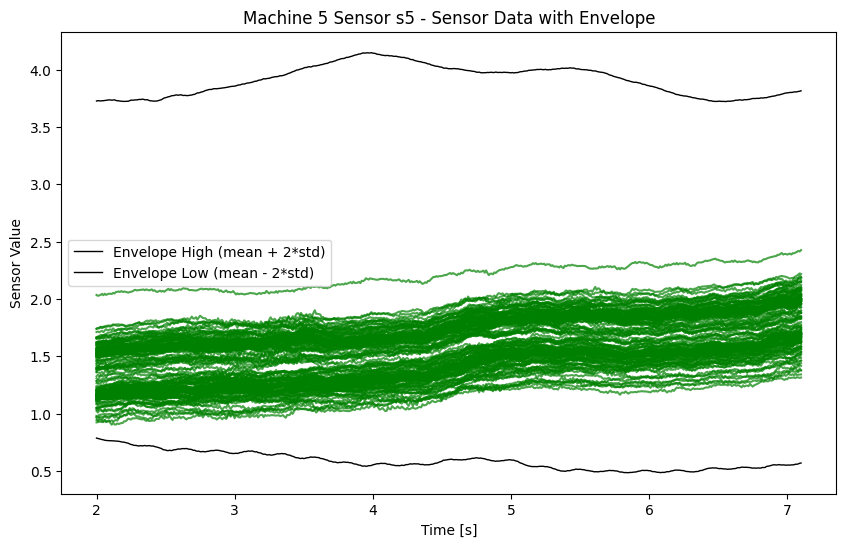

Merging training data from machines 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14


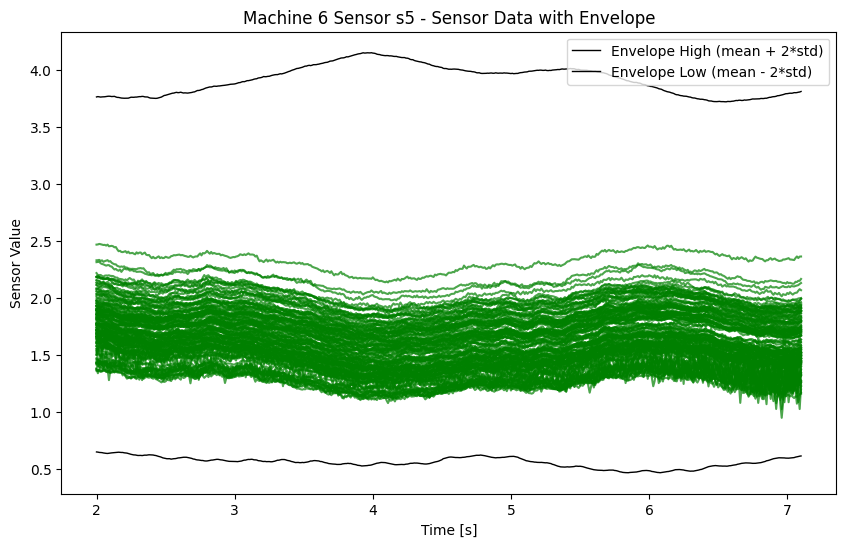

Merging training data from machines 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14


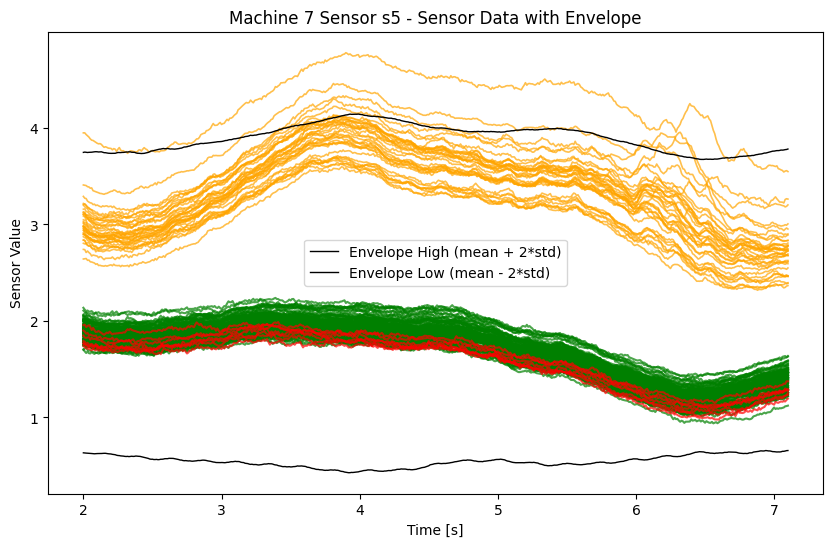

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14


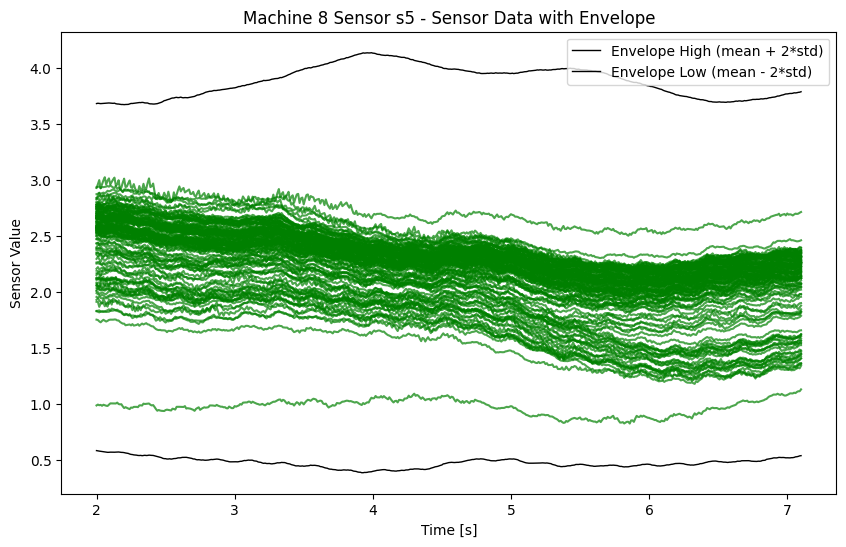

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14


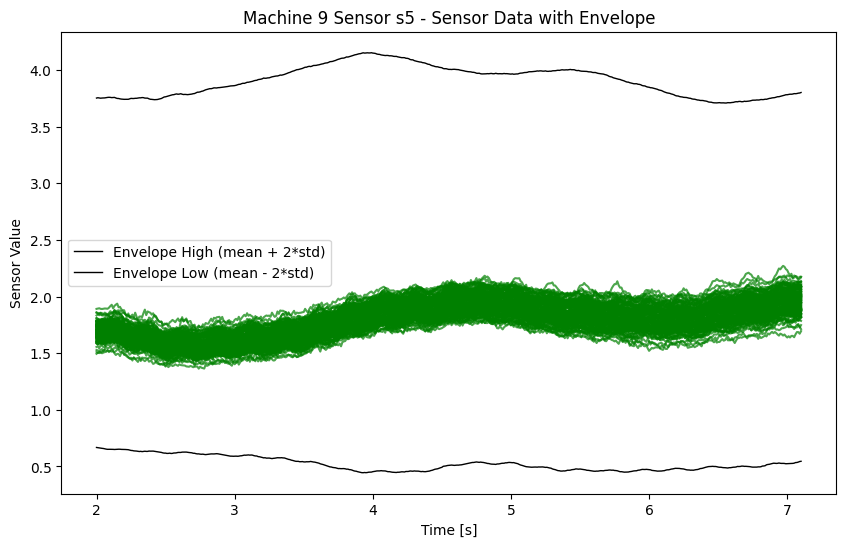

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14


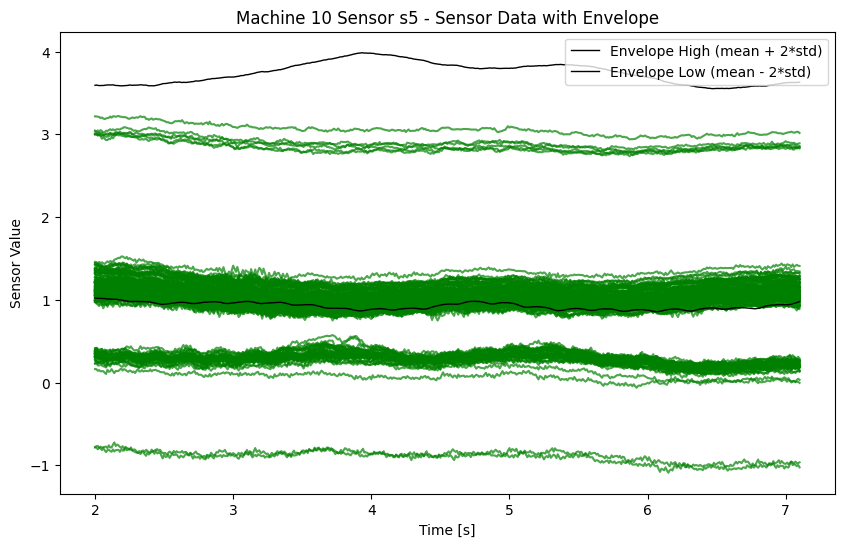

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14


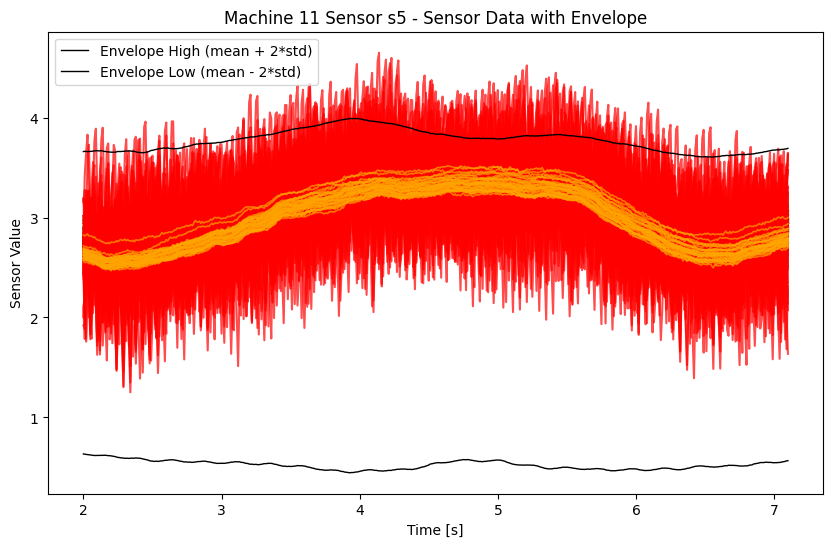

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14


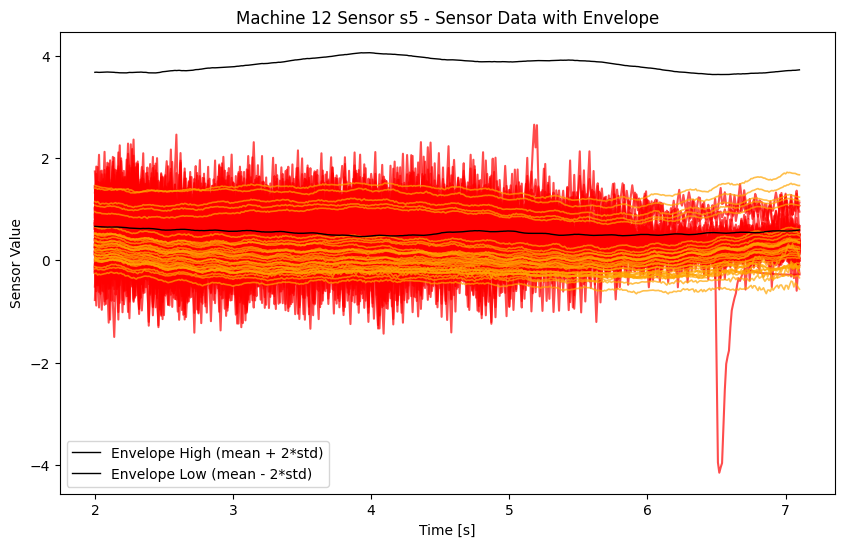

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12


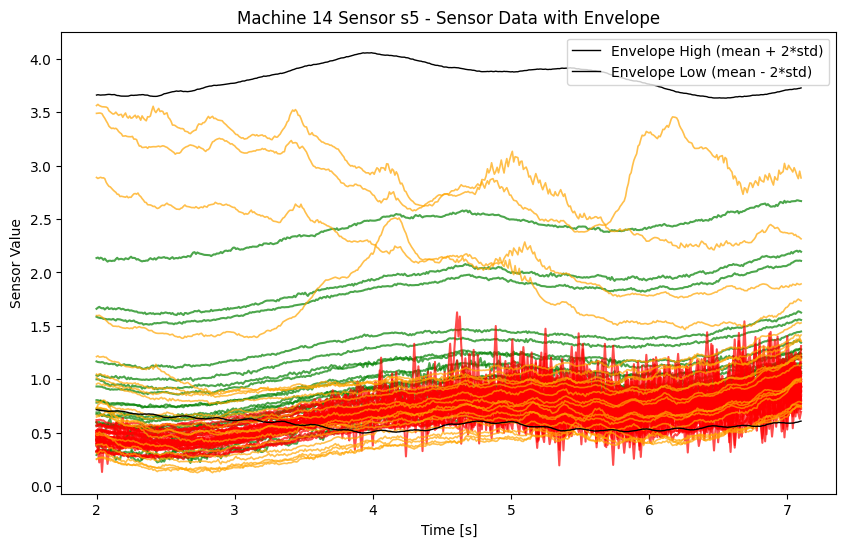





Results for sensor s5
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+
|                |   Machine 1 |   Machine 2 |   Machine 3 |   Machine 4 |   Machine 5 |   Machine 6 |   Machine 7 |   Machine 8 |   Machine 9 |   Machine 10 |   Machine 11 |   Machine 12 |   Machine 14 |
+================+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+
| FPR            |           0 |   0.0863309 |           0 |    0.028777 |           0 |           0 |    0        |           0 |           0 |     0.635762 |    0.0222222 |     0        |     0.571429 |
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+----------

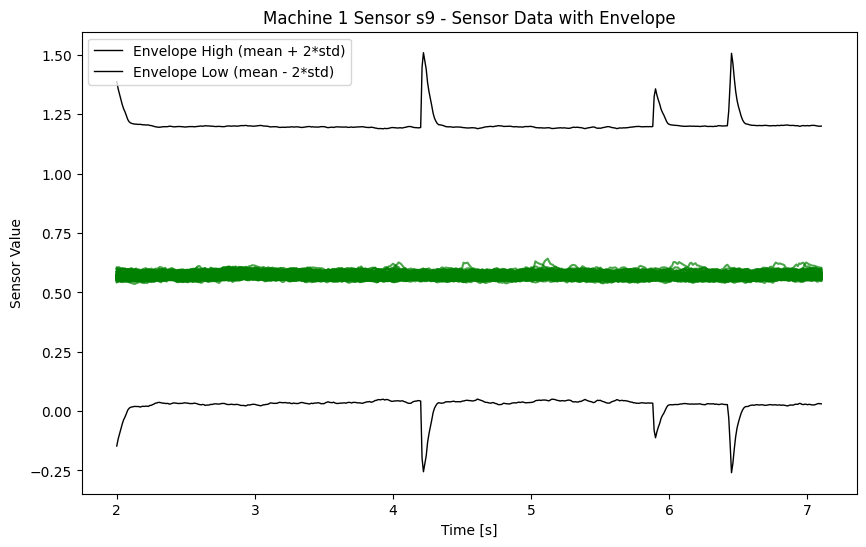

Merging training data from machines 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


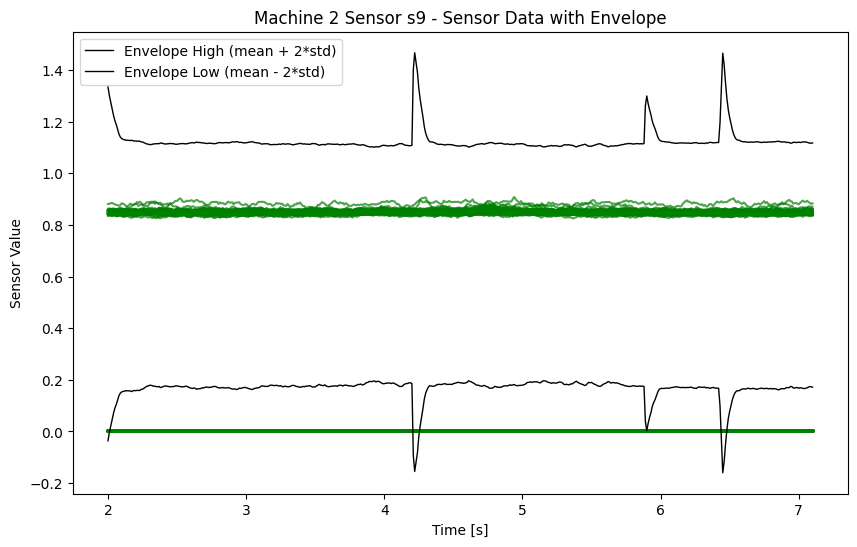

Merging training data from machines 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


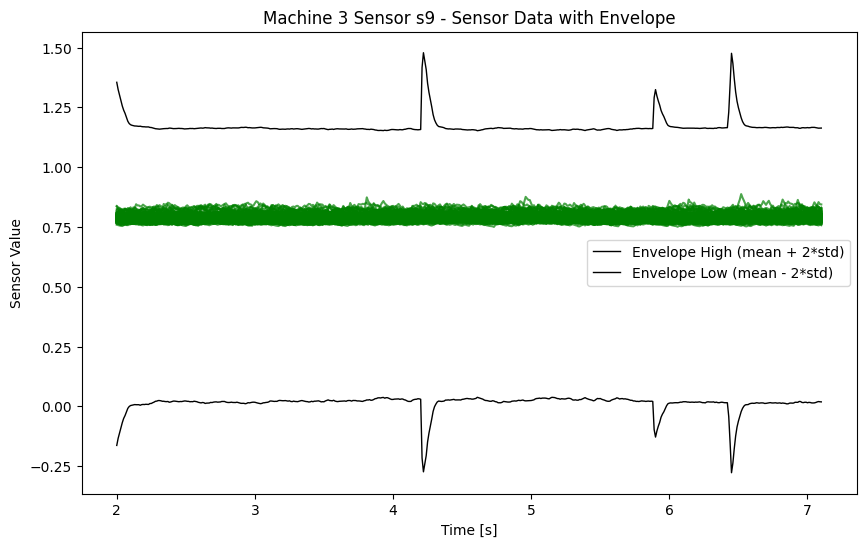

Merging training data from machines 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14


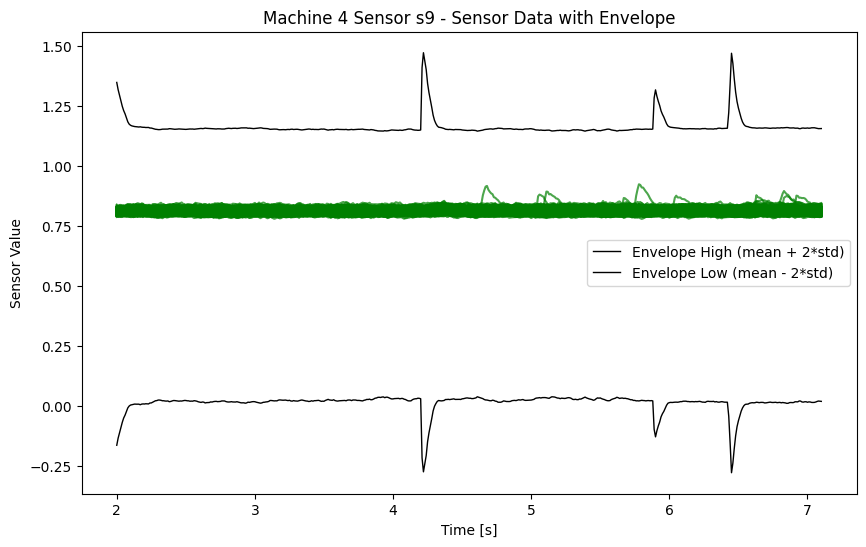

Merging training data from machines 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14


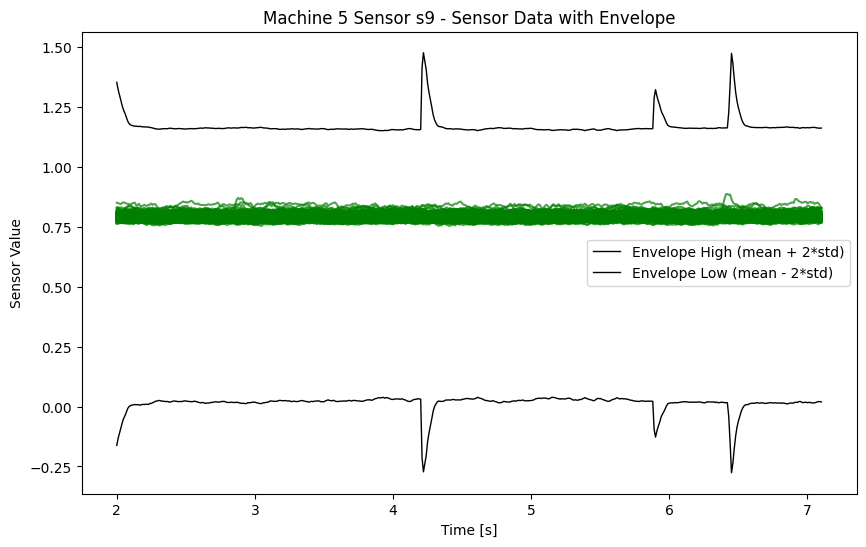

Merging training data from machines 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14


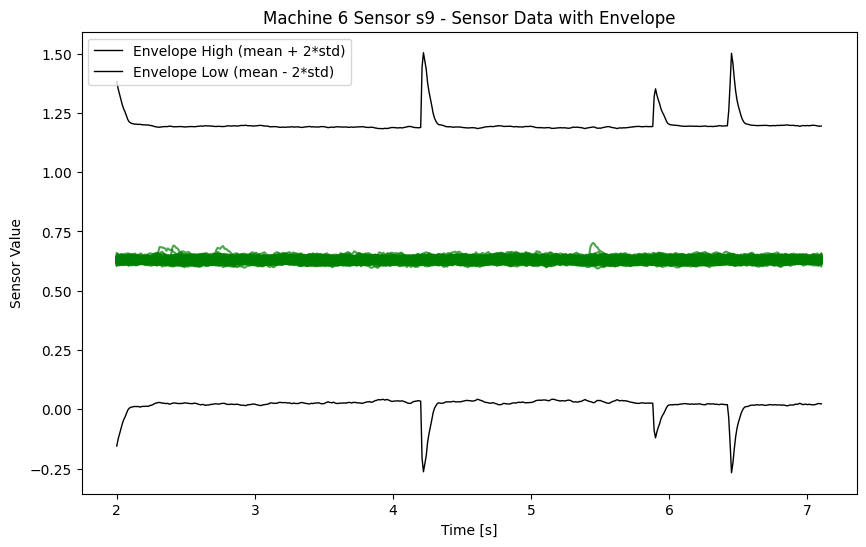

Merging training data from machines 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14


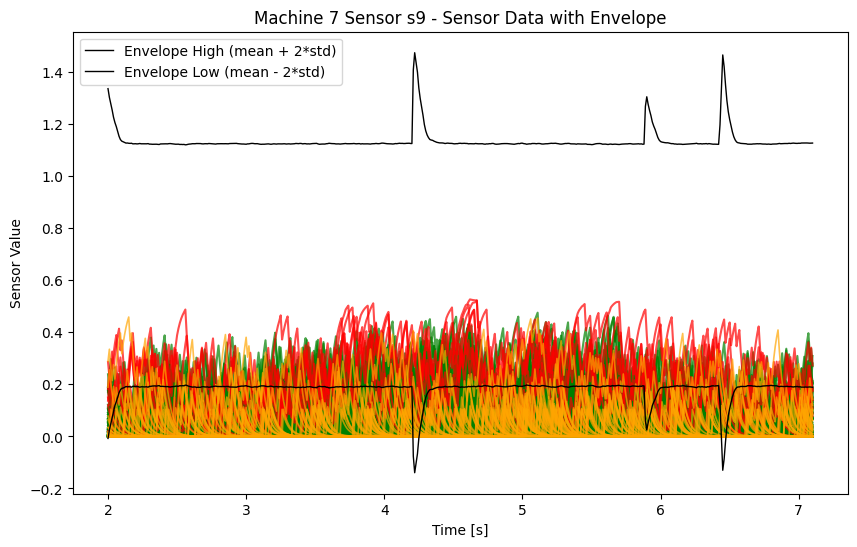

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14


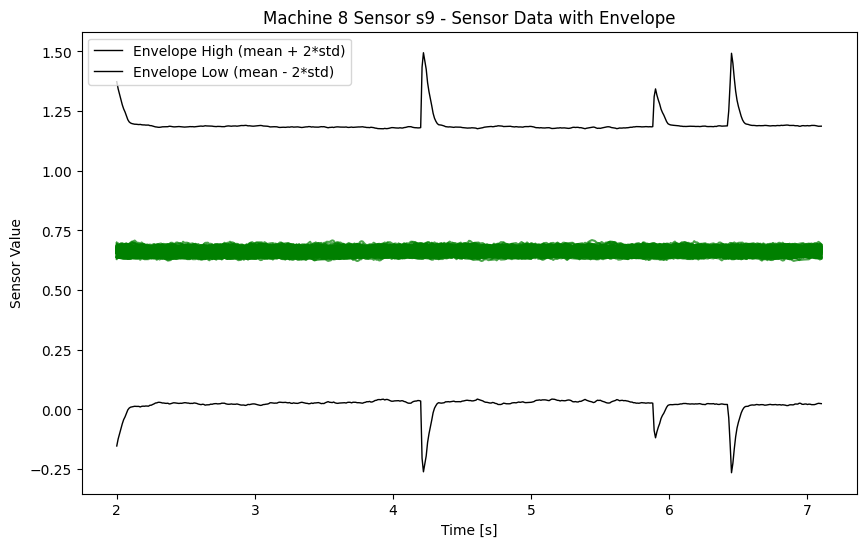

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14


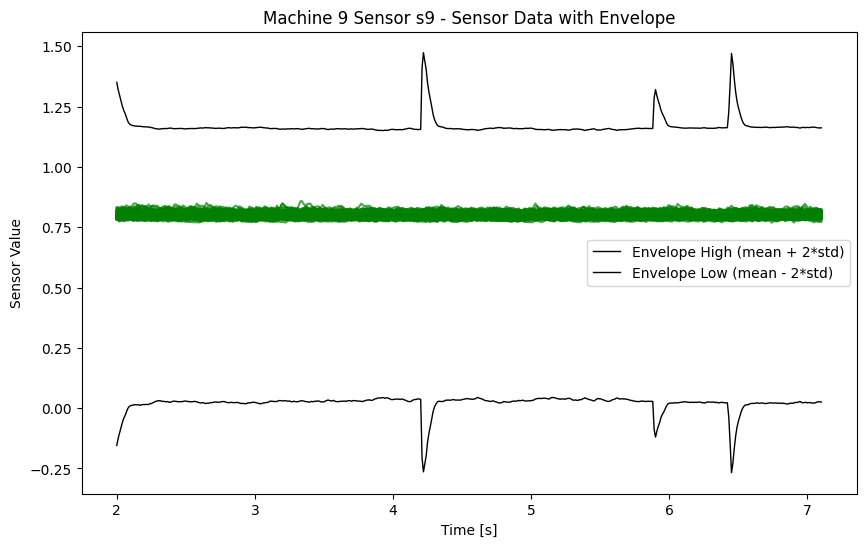

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14


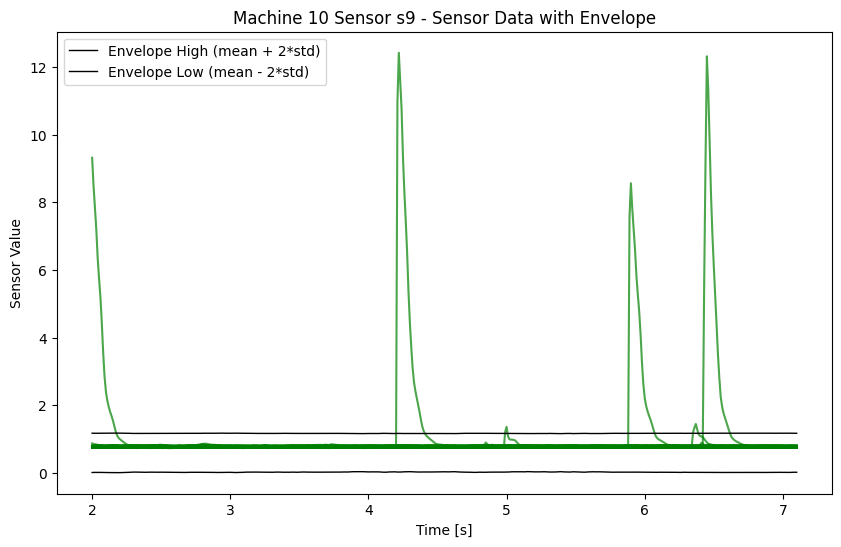

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14


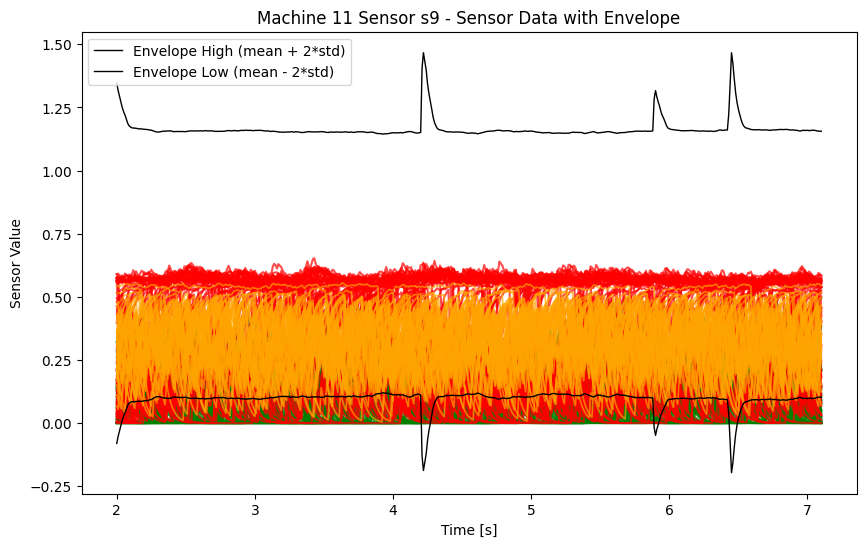

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14


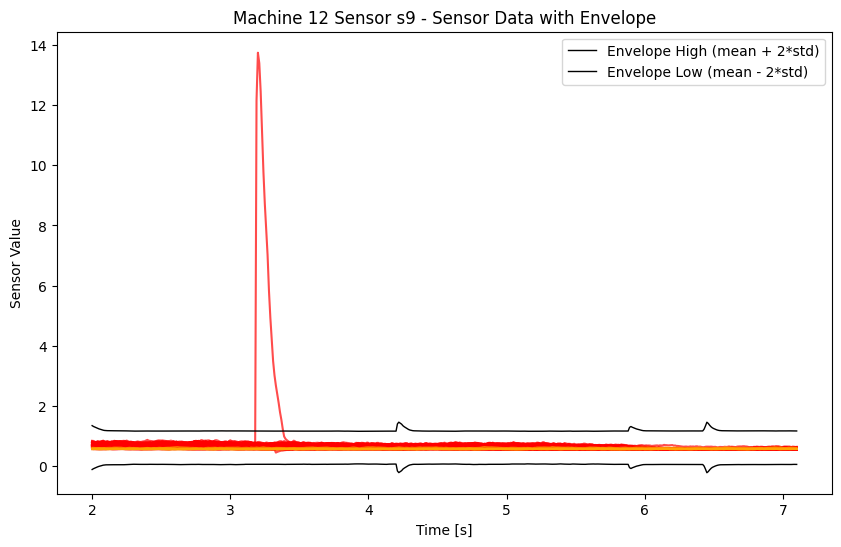

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12


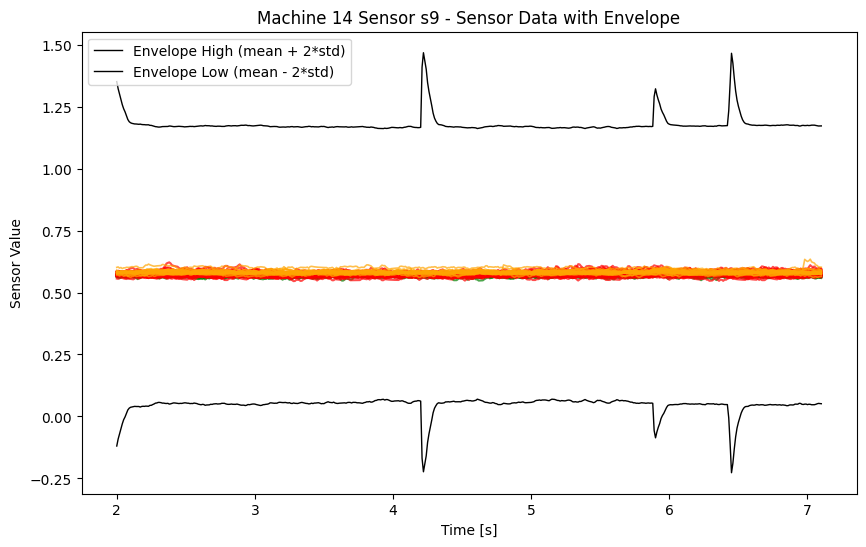





Results for sensor s9
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+
|                |   Machine 1 |   Machine 2 |   Machine 3 |   Machine 4 |   Machine 5 |   Machine 6 |   Machine 7 |   Machine 8 |   Machine 9 |   Machine 10 |   Machine 11 |   Machine 12 |   Machine 14 |
+================+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+
| FPR            |           0 |    0.640288 |           0 |           0 |           0 |           0 |    1        |           0 |           0 |    0.0397351 |     1        |    0         |            0 |
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+----------

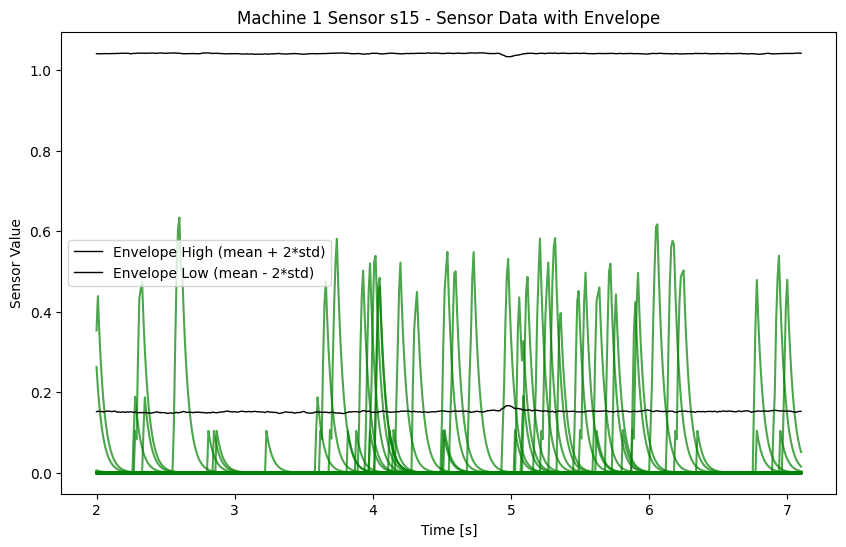

Merging training data from machines 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


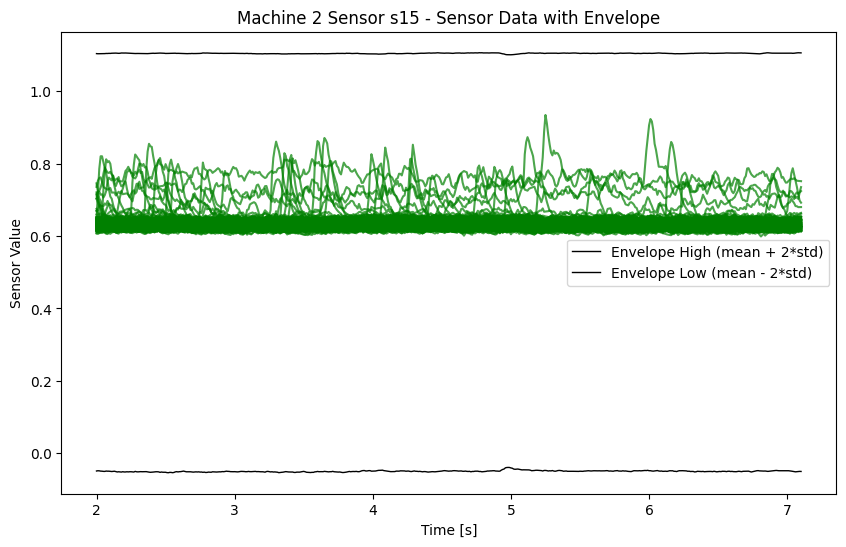

Merging training data from machines 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14


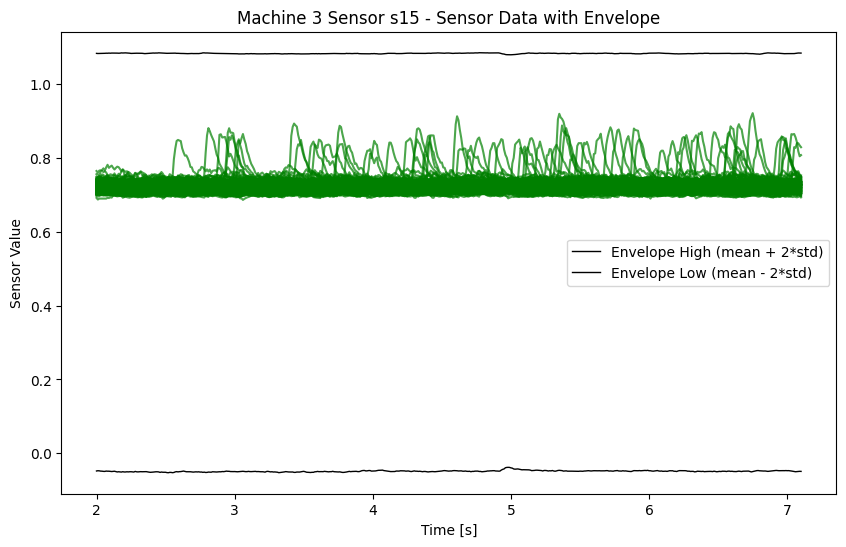

Merging training data from machines 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14


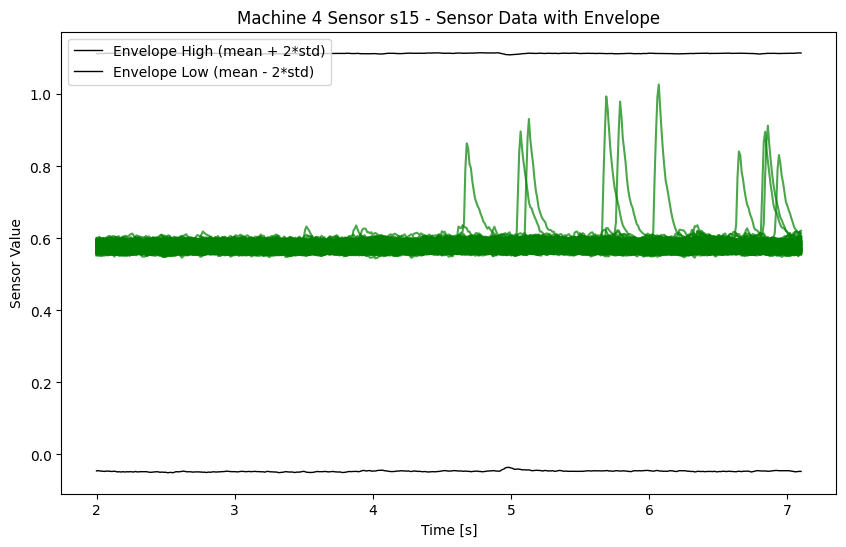

Merging training data from machines 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14


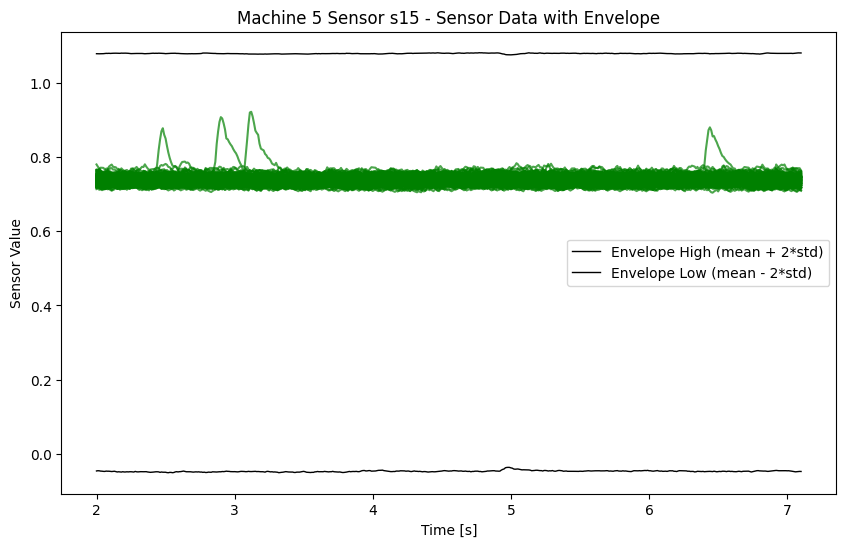

Merging training data from machines 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14


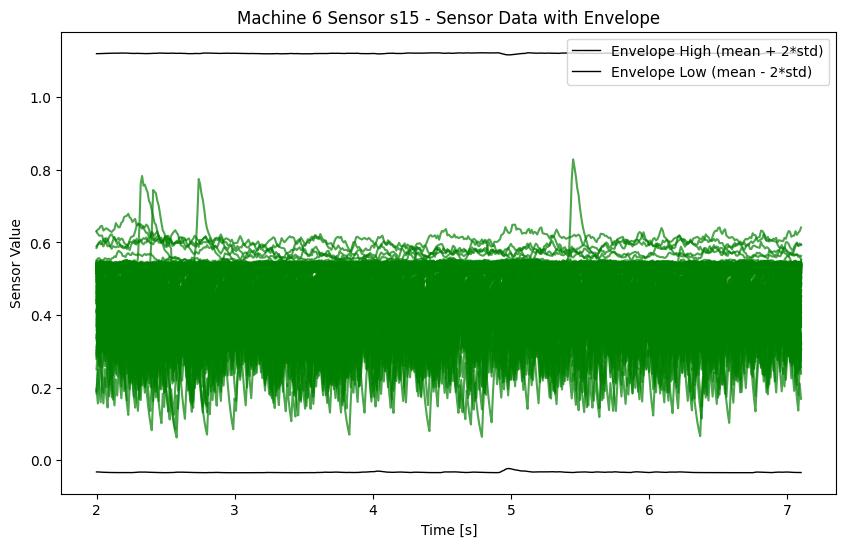

Merging training data from machines 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14


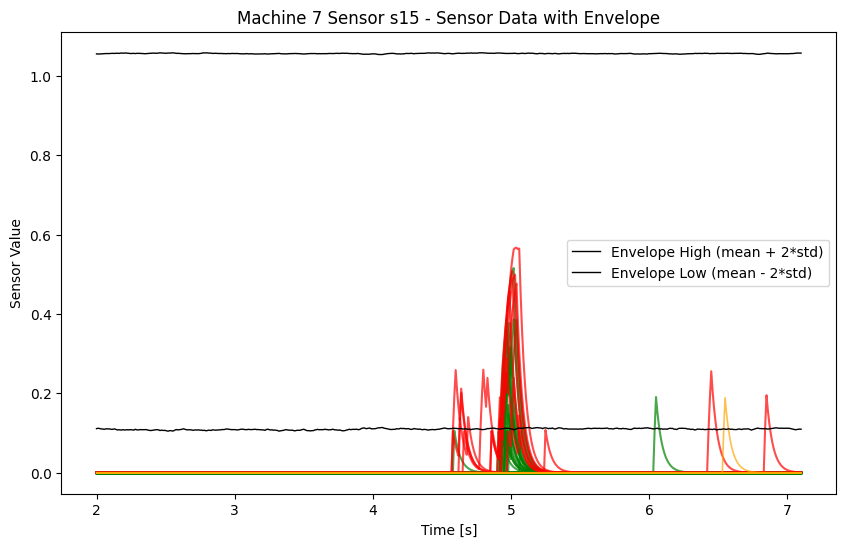

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14


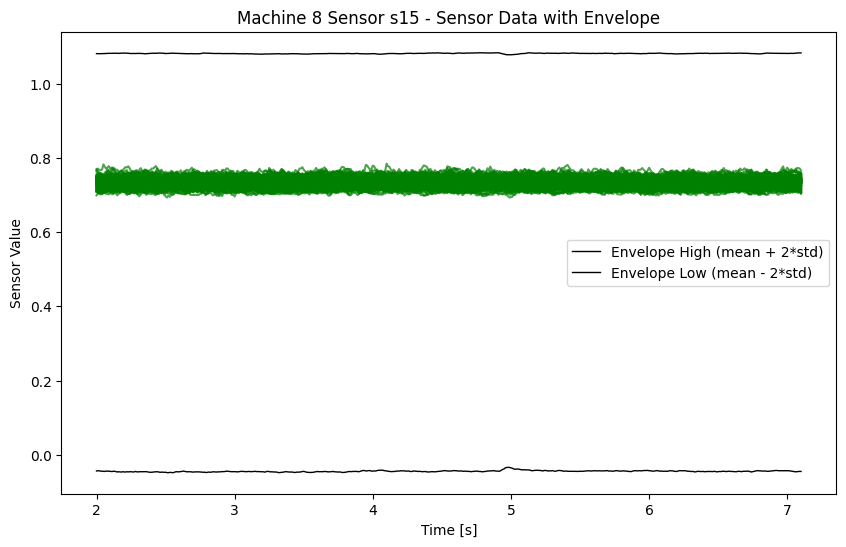

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14


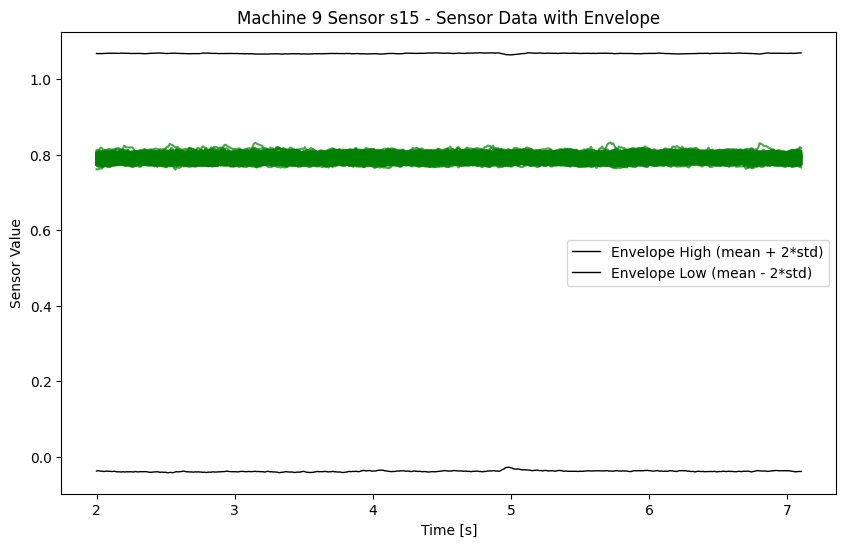

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14


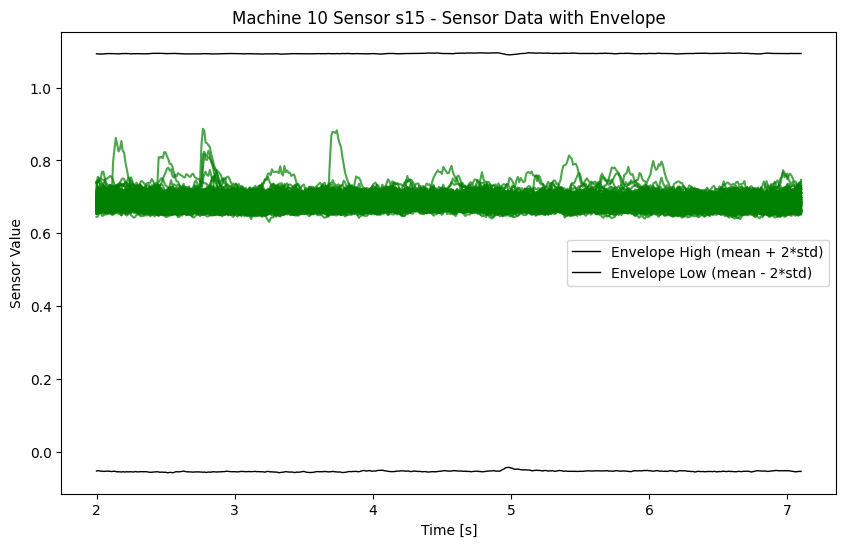

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14


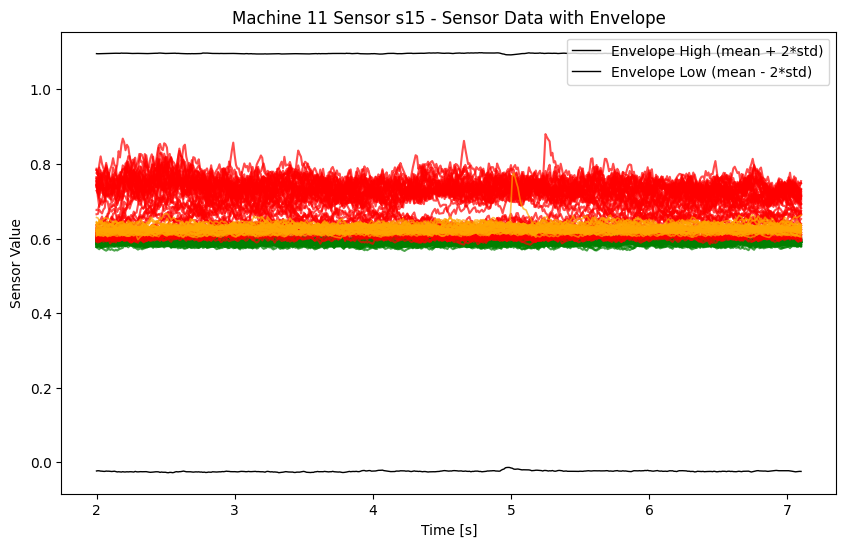

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14


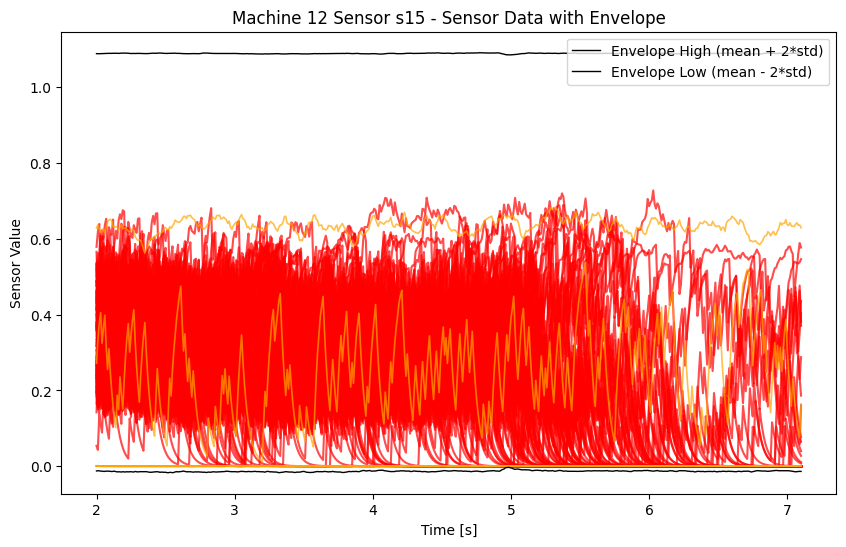

Merging training data from machines 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12


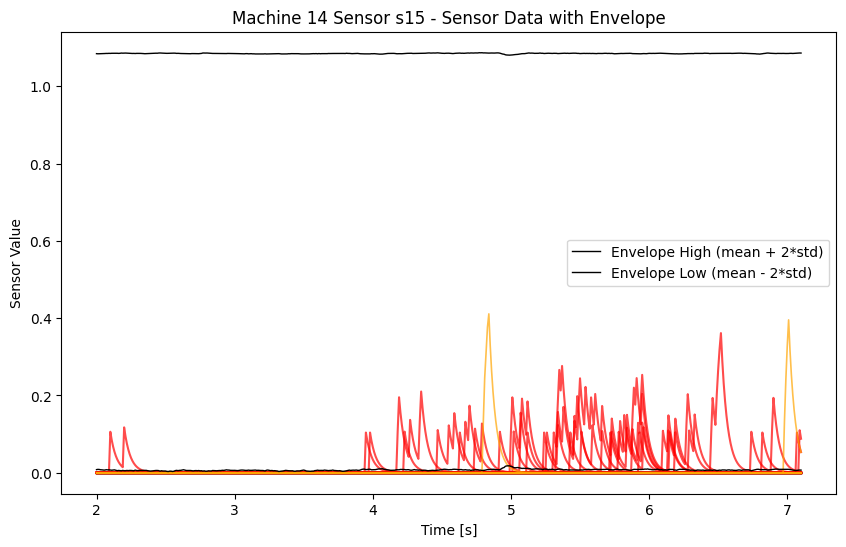





Results for sensor s15
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+
|                |   Machine 1 |   Machine 2 |   Machine 3 |   Machine 4 |   Machine 5 |   Machine 6 |   Machine 7 |   Machine 8 |   Machine 9 |   Machine 10 |   Machine 11 |   Machine 12 |   Machine 14 |
+================+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+
| FPR            |           1 |           0 |           0 |           0 |           0 |           0 |    1        |           0 |           0 |            0 |            0 |            0 |     1        |
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+---------

In [6]:
machine_sensor_predictions = {}
machine_sensor_predictions_post_fix = {}

for sensor_name in sensor_group:    
    print(f"\n\nResults for sensor {sensor_name}")

    f1_scores = []
    false_positive_rate = []
    false_positive_rate_post_fix = []
    predictions = []
    predictions_post_fix = []

    # Perform cross validation
    for i, test_machine in enumerate(machine_list):

        if test_machine.machine_name not in machine_sensor_predictions:
            machine_sensor_predictions[test_machine.machine_name] = {}
            machine_sensor_predictions_post_fix[test_machine.machine_name] = {}

        test_machine: Machine # test machine (i) against all other machines

        training_machines: List[Machine] = [x for j, x in enumerate(machine_list) if j != i]

        assert(len(training_machines) == len(machine_list) -1)
        
        training_df_combined, training_labels_combined = combine_multi_machine_data(sensor_name, training_machines)

        training_data_0, training_data_1 = split_training_data_by_label(training_df_combined, training_labels_combined)

        # Create envelope from training data with label 0 (no defect)
        envelope = calculate_envelope(training_data_0, beta_envelope)

        test_sensor_df = test_machine.get_sensor_data_by_name(sensor_name).dataframe

        test_data_0, test_data_1 = split_training_data_by_label(test_sensor_df, test_machine.labels)

        if test_machine.labels_post_fix is not None:
            test_sensor_df_post_fix = test_machine.get_sensor_data_by_name(sensor_name, post_fix=True).dataframe
            test_data_0_post_fix, test_data_1_post_fix = split_training_data_by_label(test_sensor_df_post_fix, test_machine.labels_post_fix)
            plot_sensor_envelope(envelope, test_data_0, test_data_1, beta_envelope, f"Machine {test_machine.machine_name} Sensor {sensor_name}", test_data_0_post_fix)
        else:
            plot_sensor_envelope(envelope, test_data_0, test_data_1, beta_envelope, f"Machine {test_machine.machine_name} Sensor {sensor_name}")

        predictions = classify_using_envelope(test_sensor_df, envelope, min_total_violation=envelope_min_total_violation)

        machine_sensor_predictions[test_machine.machine_name][sensor_name] = predictions        

        fpr, f1 = assess_test_results_in_envelope(test_machine.machine_name, test_machine.labels, predictions)
        
        false_positive_rate.append(fpr)
        f1_scores.append(f1)

        if test_machine.labels_post_fix is not None:
            test_sensor_df_post_fix = test_machine.get_sensor_data_by_name(sensor_name, post_fix=True).dataframe
            predictions_post_fix = classify_using_envelope(test_sensor_df_post_fix, envelope, min_total_violation=envelope_min_total_violation)

            machine_sensor_predictions_post_fix[test_machine.machine_name][sensor_name] = predictions_post_fix
            fpr_post_fix, _ = assess_test_results_in_envelope(test_machine.machine_name, test_machine.labels_post_fix, predictions_post_fix)
            false_positive_rate_post_fix.append(fpr_post_fix)
        else:
            false_positive_rate_post_fix.append((test_machine.machine_name, None))

    # Data for plotting
    categories = [f"Machine {m.machine_name}" for m in machine_list]

    data =[["FPR"] + [float(x[1]) if x[1] is not None else None for x in false_positive_rate],
        ["F1"] + [float(x[1]) if x[1] is not None else None for x in f1_scores],
        ["FPR (Post Fix)"] + [float(x[1]) if x[1] is not None else None for x in false_positive_rate_post_fix]]

    print("\n\n\n")
    print(f"Results for sensor {sensor_name}")
    print(tabulate(data, headers=categories, tablefmt='grid'))


#### Group Analysis

In [7]:
print("Checkout group predictions")

# machine_sensor_predictions_post_fix
machine_group_predictions = {}
machine_group_predictions_post_fix = {}

for i, test_machine in enumerate(machine_list):
    sensor_group_predictions = machine_sensor_predictions[test_machine.machine_name]    

    first_sensor_prediction = list(sensor_group_predictions.values())[0]
    machine_group_predictions[test_machine.machine_name] = np.array(first_sensor_prediction)

    for i in range(first_sensor_prediction.shape[0]):
        machine_group_predictions[test_machine.machine_name][i] = 0

        fail_cnt = 0
        for sensor_name in sensor_group_predictions:
            if sensor_group_predictions[sensor_name][i] == 1:
                fail_cnt += 1
            
        if fail_cnt >= sensor_group_decision_count:
            machine_group_predictions[test_machine.machine_name][i] = 1

    #########################################
    # check post pix sensor group predictions
    sensor_group_predictions_post_fix = machine_sensor_predictions_post_fix[test_machine.machine_name]
    if test_machine.labels_post_fix is not None:
        first_sensor_prediction_post_fix = list(sensor_group_predictions_post_fix.values())[0]   
        machine_group_predictions_post_fix[test_machine.machine_name] = np.array(first_sensor_prediction_post_fix)
        for i in range(first_sensor_prediction_post_fix.shape[0]):
            machine_group_predictions_post_fix[test_machine.machine_name][i] = 0

            fail_cnt = 0
            for sensor_name in sensor_group_predictions_post_fix:
                if sensor_group_predictions_post_fix[sensor_name][i] == 1:
                    fail_cnt += 1
                
            if fail_cnt >= sensor_group_decision_count:
                machine_group_predictions_post_fix[test_machine.machine_name][i] = 1
    else:
        machine_group_predictions_post_fix[test_machine.machine_name] = None

f1_scores = []
false_positive_rate = []
false_positive_rate_post_fix = []

for i, test_machine in enumerate(machine_list):
    fpr, f1 = assess_test_results_in_envelope(test_machine.machine_name, test_machine.labels, machine_group_predictions[test_machine.machine_name])
        
    false_positive_rate.append(fpr)
    f1_scores.append(f1)

    if test_machine.labels_post_fix is not None:
        fpr_post_fix, _ = assess_test_results_in_envelope(test_machine.machine_name, test_machine.labels_post_fix, machine_group_predictions_post_fix[test_machine.machine_name])
        false_positive_rate_post_fix.append(fpr_post_fix)
    else:
        false_positive_rate_post_fix.append((test_machine.machine_name, None))


# Data for plotting
categories = [f"Machine {m.machine_name}" for m in machine_list]

data =[["FPR"] + [float(x[1]) if x[1] is not None else None for x in false_positive_rate],
    ["F1"] + [float(x[1]) if x[1] is not None else None for x in f1_scores],
    ["FPR (Post Fix)"] + [float(x[1]) if x[1] is not None else None for x in false_positive_rate_post_fix]]

print("\n\n\n")
print(f"Results for sensor group")
print(tabulate(data, headers=categories, tablefmt='grid'))

Checkout group predictions




Results for sensor group
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+
|                |   Machine 1 |   Machine 2 |   Machine 3 |   Machine 4 |   Machine 5 |   Machine 6 |   Machine 7 |   Machine 8 |   Machine 9 |   Machine 10 |   Machine 11 |   Machine 12 |   Machine 14 |
+================+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+
| FPR            |           1 |    0.661871 |           0 |    0.028777 |           0 |           0 |    1        |           0 |           0 |     0.655629 |     1        |     0        |     1        |
+----------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------